In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


df = pd.read_csv(r'C:\Users\insid\OneDrive\Desktop\Project DL\IMDB Dataset.csv')


nltk.download('stopwords')
nltk.download('wordnet')



def preprocess_text(text):
    
    text = text.lower()
    
    
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    
    
    words = text.split()
    
    
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    
    processed_text = ' '.join(words)
    
    return processed_text

df['processed_text'] = df['review'].apply(preprocess_text)


def create_word_freq_dict(reviews):
    word_freq = {}
    for review in reviews:
        words = review.split()
        for word in words:
            if word in word_freq:
                word_freq[word] += 1
            else:
                word_freq[word] = 1
    return word_freq

positive_reviews = df[df['sentiment'] == 'positive']['processed_text']
negative_reviews = df[df['sentiment'] == 'negative']['processed_text']

positive_word_freq = create_word_freq_dict(positive_reviews)
negative_word_freq = create_word_freq_dict(negative_reviews)


df['processed_text'] = df['review'].apply(preprocess_text)


def create_word_freq_dict(reviews):
    word_freq = {}
    for review in reviews:
        words = review.split()
        for word in words:
            if word in word_freq:
                word_freq[word] += 1
            else:
                word_freq[word] = 1
    return word_freq

positive_reviews = df[df['sentiment'] == 'positive']['processed_text']
negative_reviews = df[df['sentiment'] == 'negative']['processed_text']

positive_word_freq = create_word_freq_dict(positive_reviews)
negative_word_freq = create_word_freq_dict(negative_reviews)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\insid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\insid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


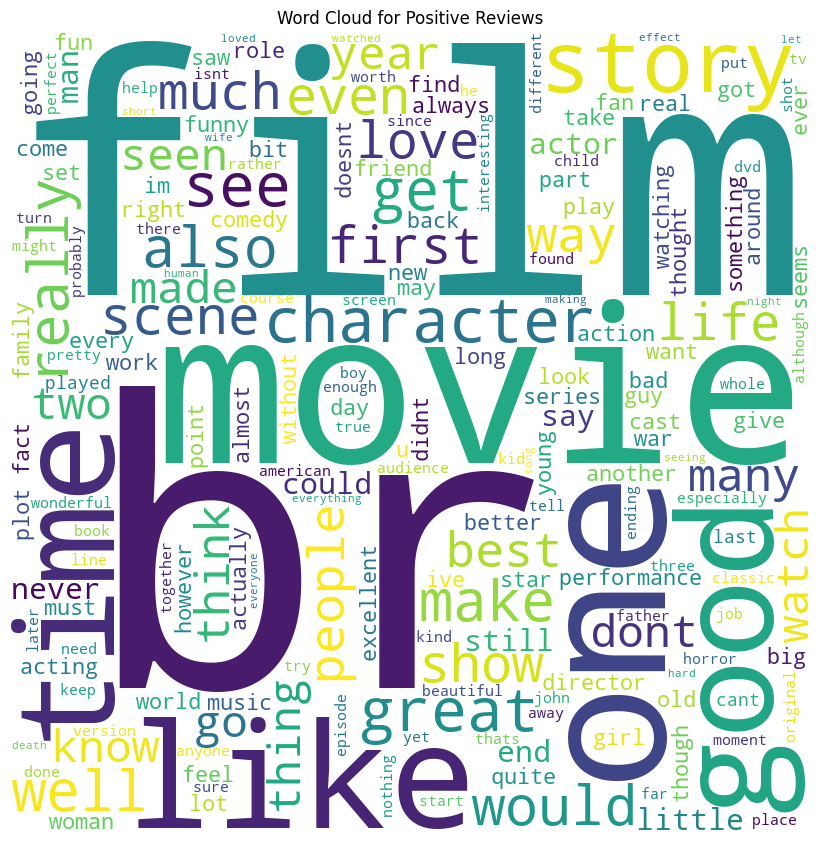

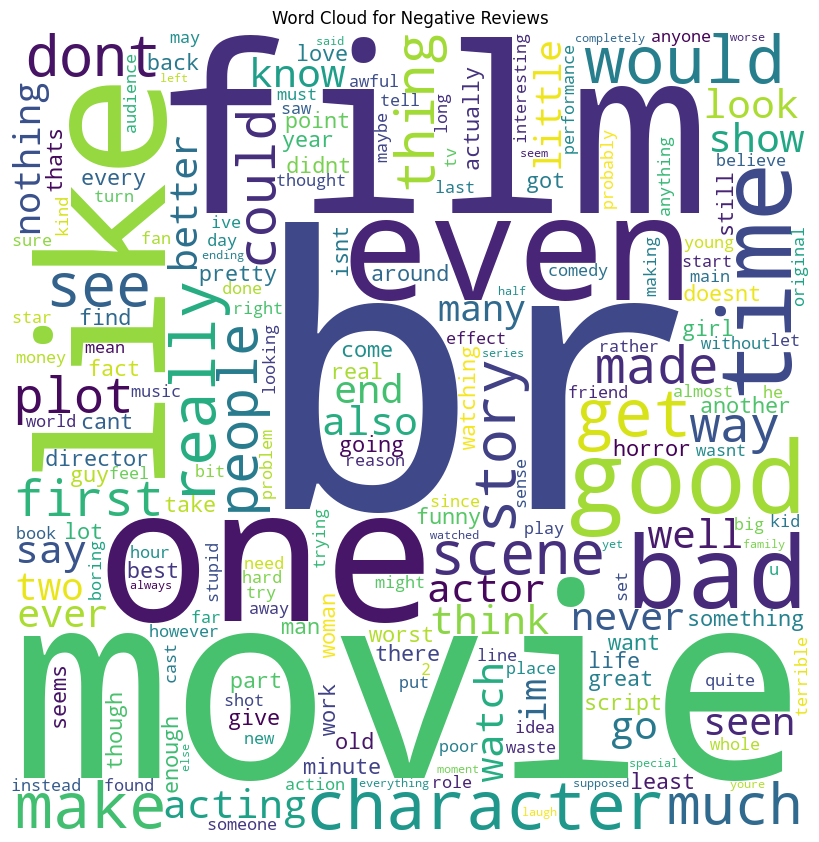

In [25]:


def create_word_cloud(word_freq, sentiment):
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"Word Cloud for {sentiment} Reviews")
    plt.show()

create_word_cloud(positive_word_freq, "Positive")
create_word_cloud(negative_word_freq, "Negative")

In [1]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


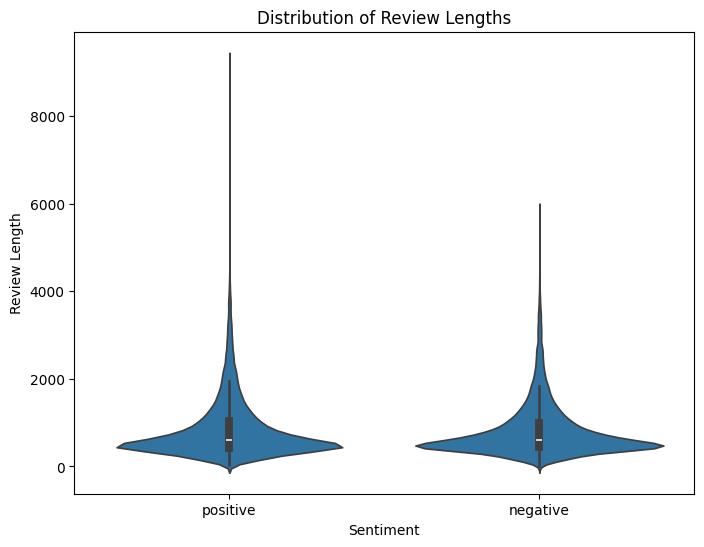

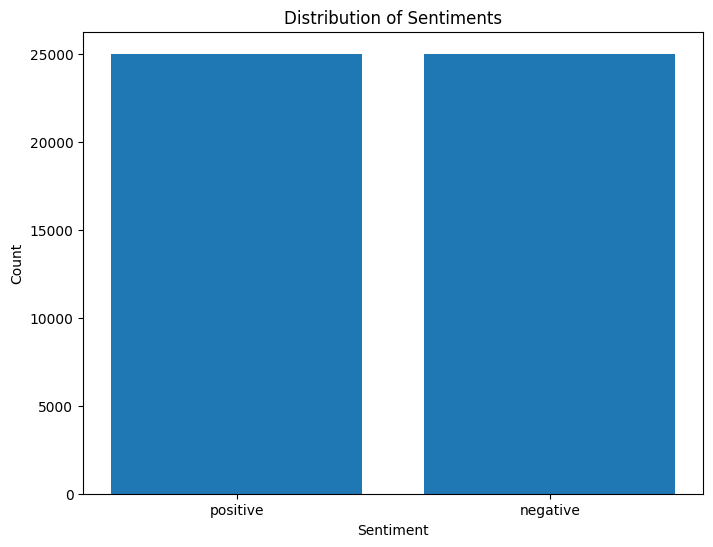

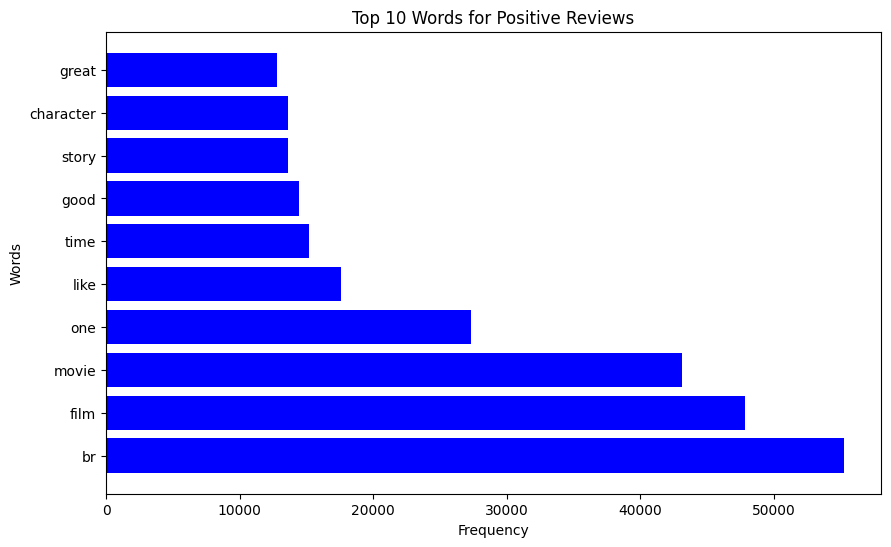

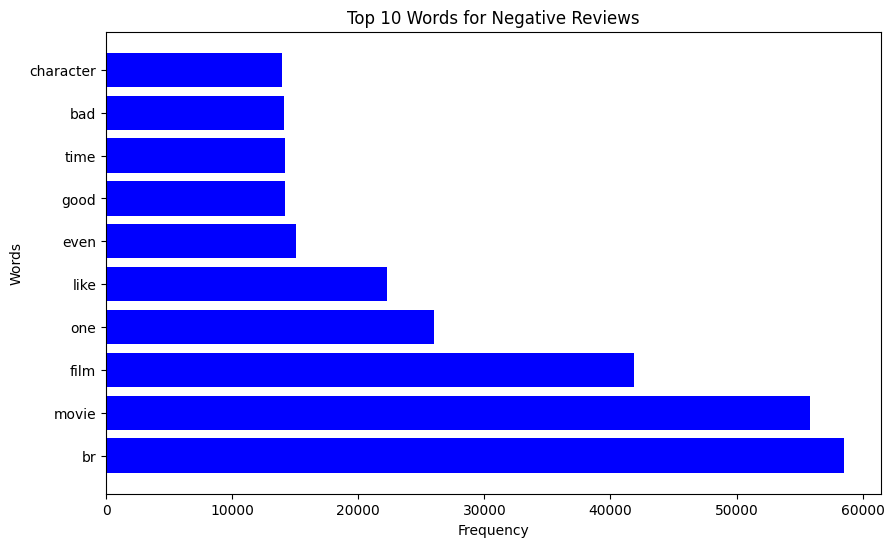

In [28]:

plt.figure(figsize=(8, 6))
sns.violinplot(x='sentiment', y=df['processed_text'].apply(len), data=df)
plt.title('Distribution of Review Lengths')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()


sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


def plot_top_words(word_freq, sentiment, top_n=10):
    top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]
    words, frequencies = zip(*top_words)
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(words)), frequencies, color='blue')
    plt.yticks(range(len(words)), words)
    plt.title(f'Top {top_n} Words for {sentiment} Reviews')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

plot_top_words(positive_word_freq, "Positive")
plot_top_words(negative_word_freq, "Negative")


def generate_bigrams(reviews):
    bigrams = []
    for review in reviews:
        words = review.split()
        for i in range(len(words) - 1):
            bigrams.append((words[i], words[i+1]))
    return bigrams

positive_bigrams = generate_bigrams(positive_reviews)
negative_bigrams = generate_bigrams(negative_reviews)

def create_bigram_network(bigrams, sentiment):
    G = nx.Graph()
    for bigram in bigrams:
        G.add_edge(bigram[0], bigram[1])
    pos = nx.spring_layout(G, k=0.5)
    plt.figure(figsize=(10, 8))
    nx.draw_networkx(G, pos, edge_color='black', width=1, linewidths=1, node_size=500, node_color='seagreen', alpha=0.9, labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.title(f'Bigram Network for {sentiment} Reviews')
    plt.show()

create_bigram_network(positive_bigrams, "Positive")
create_bigram_network(negative_bigrams, "Negative")


sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()



df['date'] = pd.to_datetime(df['date'])
sentiment_over_time = df.groupby([pd.Grouper(key='date', freq='M'), 'sentiment']).size().unstack()
plt.figure(figsize=(12, 6))
sentiment_over_time.plot(kind='line', marker='o')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()